In [23]:
import sys
import pysam
from traceback import print_exc
import numpy as np
import matplotlib.pyplot as plt

def campute_truncation(sam):
    bamfile = pysam.AlignmentFile(sam, "r")
    left_truncations = []
    right_truncations = []
    for alignment in bamfile:
        if alignment.is_secondary or alignment.is_supplementary or alignment.is_unmapped:
              continue
    
        transcript_len = bamfile.get_reference_length(bamfile.get_reference_name(alignment.reference_id))
        left_truncations.append(float(alignment.reference_start) / float(transcript_len))
        right_truncations.append(float(transcript_len - alignment.reference_end) / float(transcript_len))
    return transcript_len, left_truncations, right_truncations


def plot_proba(bins, probs_list, labels_list):
    bin_centers = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]

    plt.figure(figsize=(8,5))
    
    for probs, label in zip(probs_list, labels_list):
        plt.plot(bin_centers, probs, label=label)

    plt.title("Probabilities for Left Truncations (Line Plot)")
    plt.xlabel("Normalized Position (0 to 1)")
    plt.ylabel("Probability")
    #plt.grid(axis="both", linestyle="--", alpha=0.7)
    plt.ylim(0, 0.05)
    plt.legend()
    plt.savefig() "fig_truncation_3p.pdf", format="pdf", )
    plt.show()


def comp_hist(truncations):
    bins = [0.0] + [0.005 + 0.01 * i for i in range(0,100)] + [1.0]
    res_left = np.histogram(truncations, bins=bins, density=True)
    
    probs_l = []
    for i, w in enumerate(res_left[0]):
        probs_l.append(w * (bins[i+1] - bins[i]))
    return probs_l

In [6]:
#bam = '../paper/sorted_output.bam'
#bam = 'Lexogen.SIRVs.Set4.ONT_cDNA.R10.4.HQ.sorted.bam'
sam_real = 'PBMC_alignment.cDNA.sam'
#sam = 'scNaUmi-seq_alignment.cDNA.sam'
#sam = 'tksm_alignment.cDNA.sam'
sam_tksm = 'tksm_alignment.cDNA_1M.sam'
#sam = 'asaruSim_alignment.cDNA.sam'
#sam = 'truncated_scNaUmi-seq_alignment.cDNA.sam'
sam_asaru=  'truncated_Asarusim_PBMC_full_length_alignment.cDNA.sam'

In [9]:
_, left_truncations_real, right_truncations_real = campute_truncation(sam_real)
_, left_truncations_tksm, right_truncations_tksm = campute_truncation(sam_tksm)
_, left_truncations_asaru, right_truncations_asaru = campute_truncation(sam_asaru)

In [11]:
probs_real = comp_hist(right_truncations_real)
probs_tksm = comp_hist(right_truncations_tksm)
probs_asaru = comp_hist(right_truncations_asaru)

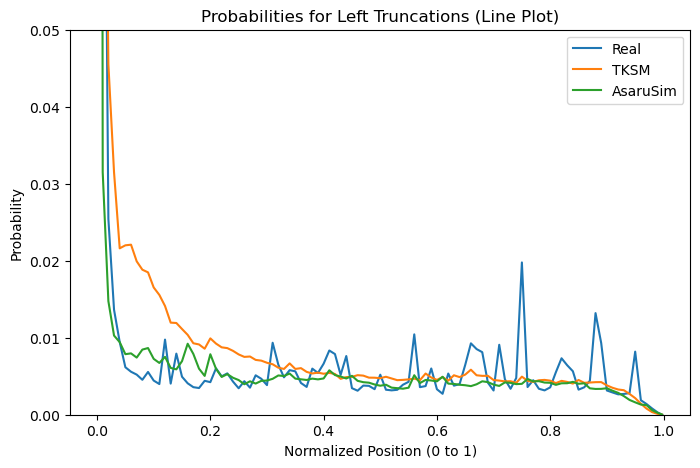

In [24]:
plot_proba(bins, [probs_real, probs_tksm, probs_asaru], ['Real', 'TKSM', 'AsaruSim'])

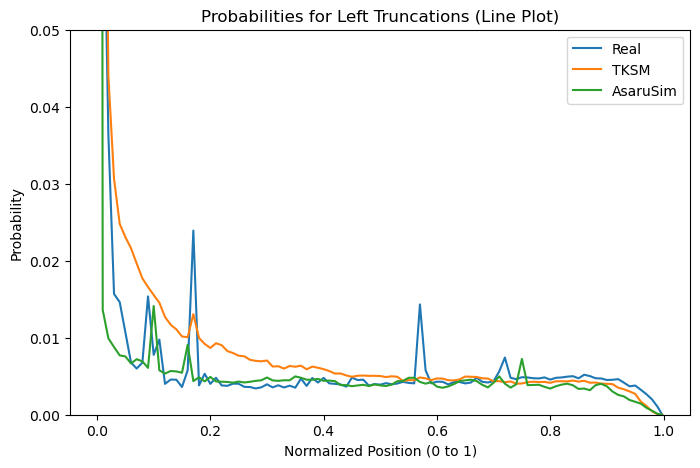

In [22]:
probs_left_real = comp_hist(left_truncations_real)
probs_left_tksm = comp_hist(left_truncations_tksm)
probs_left_asaru = comp_hist(left_truncations_asaru)
plot_proba(bins, [probs_left_real, probs_left_tksm, probs_left_asaru], ['Real', 'TKSM', 'AsaruSim'])

In [379]:
df = pd.DataFrame({
    "left": probs_left_real,
    "right": probs_real
})
df.to_csv("default_model.csv")